In [5]:
import torch.nn as nn
import torch
import torch.nn.functional as F
from torchvision import datasets, transforms
import numpy as np

In [90]:
mnist_train = datasets.MNIST(root="./datasets", train=True, transform=transforms.ToTensor(), download=True)
mnist_test = datasets.MNIST(root="./datasets", train=False, transform=transforms.ToTensor(), download=True)
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=100, shuffle=False)

In [8]:
acc=[]

In [34]:
acc_epoch=[]

In [102]:
class MNIST_Multilayer_P(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin1 = nn.Linear(784,5)
        self.lin2=nn.Linear(5,12)
        self.lin3=nn.Linear(12,6)
        self.lin4=nn.Linear(6,11)
        self.lin5=nn.Linear(11,7)
        self.lin6=nn.Linear(7,10)
        self.lin7=nn.Linear(10,3)
        self.lin8=nn.Linear(3,6)
        self.lin9=nn.Linear(6,10)
    def forward(self, x):
        x=self.lin1(x)
        x=F.relu(x)
        x=self.lin2(x)
        x=F.relu(x)
        x=self.lin3(x)
        x=F.relu(x)
        x=self.lin4(x)
        x=F.relu(x)
        x=self.lin5(x)
        x=F.relu(x)
        x=self.lin6(x)
        x=F.relu(x)
        x=self.lin7(x)
        x=F.relu(x)
        x=self.lin8(x)
        x=F.relu(x)
        return(self.lin9(x))

In [103]:
%%time
model=MNIST_Multilayer_P()#calling the multilayer_p model 
croos_entropy=nn.CrossEntropyLoss()#cross_entropy loss
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)#optimizer
for e in range(30):
    for images, labels in train_loader:
        x = images.view(-1, 28*28)
        optimizer.zero_grad()
        y=model(x)
        loss=croos_entropy(y,labels)
        loss.backward()
        optimizer.step()
correct = 0
total = len(mnist_test)
with torch.no_grad():
   for images, labels in test_loader:
        x = images.view(-1, 28*28)
        y=model(x)
        predictions = torch.argmax(y, dim=1)
        correct += torch.sum((predictions == labels).float())
#acc_epoch.append(correct/total)
print(correct/total)

tensor(0.8058)
Wall time: 5min 1s


In [28]:
acc=np.array(acc)
h_layers=np.array([1,2,3,4,5,6,7,8])
acc_copy=acc

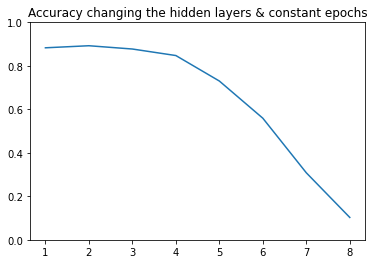

In [31]:
from matplotlib import pyplot
pyplot.plot(h_layers,acc)
pyplot.ylim(0,1)
pyplot.title("Accuracy changing the hidden layers & constant epochs")
pyplot.show()

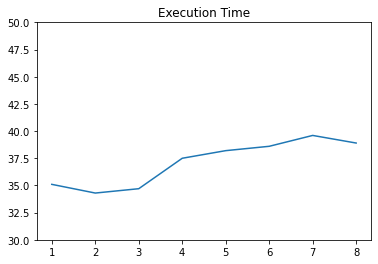

In [33]:
time=np.array([35.1,34.3,34.7,37.5,38.2,38.6,39.6,38.9])
pyplot.plot(h_layers,time)
pyplot.ylim(30,50)
pyplot.title("Execution Time")
pyplot.show()

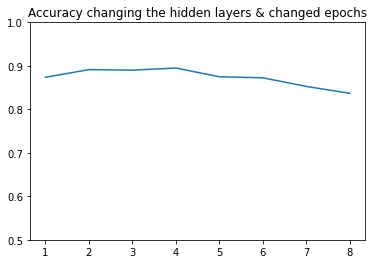

In [75]:
acc_epoch=np.array(acc_epoch)
pyplot.plot(h_layers,acc_epoch)
pyplot.ylim(0.5,1)
pyplot.title("Accuracy changing the hidden layers & changed epochs")
pyplot.show()

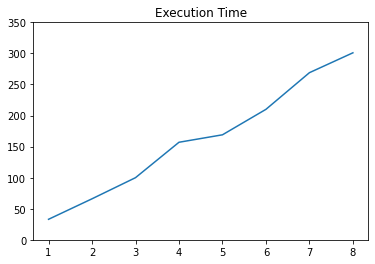

In [105]:
time_epoch=np.array([33,66,100,157,169,210,269,301])
pyplot.plot(h_layers,time_epoch)
pyplot.ylim(0,350)
pyplot.title("Execution Time")
pyplot.show()

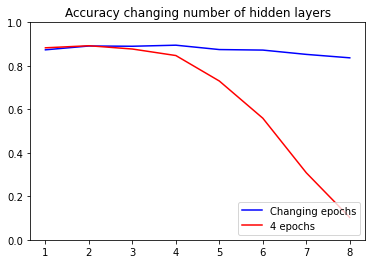

In [84]:
pyplot.plot(h_layers,acc_epoch,color='b')
pyplot.plot(h_layers,acc_copy,color='r')
pyplot.ylim(0,1)
pyplot.title("Accuracy changing number of hidden layers")
pyplot.legend(["Changing epochs", "4 epochs"], loc ="lower right")
pyplot.show()

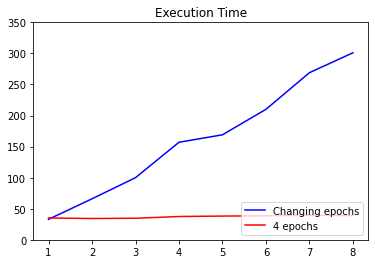

In [107]:
pyplot.plot(h_layers,time_epoch,color='b')
pyplot.plot(h_layers,time,color='r')
pyplot.ylim(0,350)
pyplot.title("Execution Time")
pyplot.legend(["Changing epochs", "4 epochs"], loc ="lower right")
pyplot.show()

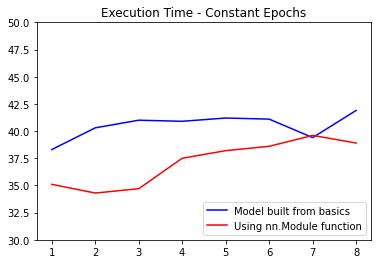

In [111]:
time_4_epoch=np.array([38.3,40.3,41,40.9,41.2,41.1,39.4,41.9])
pyplot.plot(h_layers,time_4_epoch,color='b')
pyplot.plot(h_layers,time,color='r')
pyplot.ylim(30,50)
pyplot.title("Execution Time - Constant Epochs")
pyplot.legend(["Model built from basics", "Using nn.Module function"], loc ="lower right")
pyplot.show()

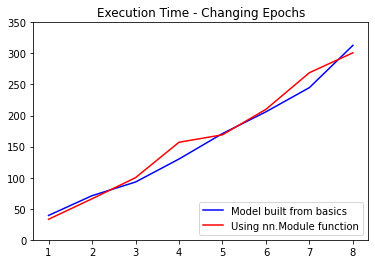

In [108]:
time_changed_epoch=np.array([39.2,71,93,130,171,206,245,313])
pyplot.plot(h_layers,time_changed_epoch,color='b')
pyplot.plot(h_layers,time_epoch,color='r')
pyplot.ylim(0,350)
pyplot.title("Execution Time - Changing Epochs")
pyplot.legend(["Model built from basics", "Using nn.Module function"], loc ="lower right")
pyplot.show()